In [17]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:

# Step 1: Set up the paths to the extracted data
train_dir = '/mnt/data/extracted_train/Train'  # Path to the 'Train' directory
test_dir = '/mnt/data/extracted_test/Test'    # Path to the 'Test' directory

In [19]:
# Step 2: Set up ImageDataGenerators for training and validation with automatic splitting
image_size = (224, 224)  # Resize images to 224x224 for CNN input
batch_size = 32

In [20]:
# Creating an ImageDataGenerator with validation_split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling images to the range [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zooming
    horizontal_flip=True,  # Horizontal flips
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

In [21]:
# Create an ImageDataGenerator for testing/validation (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [22]:
# Step 3: Load images from the directory and split them into training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the 'Train' directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (mask vs no mask)
    subset='training'  # Training data (80%)
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the 'Test' directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (mask vs no mask)
    subset='validation'  # Validation data (20%)
)

Found 4834 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [23]:
# Print class-to-folder mapping
print("Class labels and their corresponding folder names:")
print(train_generator.class_indices)


Class labels and their corresponding folder names:
{'with_mask': 0, 'without_mask': 1}


In [25]:
# Step 4: Build the CNN Model
print("Building the CNN model...")
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

Building the CNN model...


In [26]:

# Step 5: Compile the Model
print("Compiling the model...")
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Compiling the model...


In [27]:
# Step 6: Train the Model
print("Training the model...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Training the model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 68/151 ━━━━━━━━━━━━━━━━━━━━ 36s 438ms/step - accuracy: 0.5913 - loss: 1.7965

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 439ms/step - accuracy: 0.6557 - loss: 1.2307 - val_accuracy: 0.8785 - val_loss: 0.3673
Epoch 2/10
  1/151 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.7500 - loss: 0.4742

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7500 - loss: 0.4742 - val_accuracy: 0.8750 - val_loss: 0.3454
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 423ms/step - accuracy: 0.8053 - loss: 0.4430 - val_accuracy: 0.8924 - val_loss: 0.2748
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8438 - loss: 0.3858 - val_accuracy: 0.8750 - val_loss: 0.2908
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 415ms/step - accuracy: 0.8147 - loss: 0.4121 - val_accuracy: 0.8993 - val_loss: 0.2353
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.4988 - val_accuracy: 0.8924 - val_loss: 0.2424
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 414ms/step - accuracy: 0.8462 - loss: 0.3757 - val_accuracy: 0.8611 - val_loss: 0.3060
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.5620 - val_accuracy: 0.8542 - val_loss: 0.2965
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.8614 - loss: 0.3463 - val_accuracy: 0

In [28]:
# Step 7: Evaluate the Model
print("Evaluating the model on the validation set...")
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Evaluating the model on the validation set...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8984 - loss: 0.2526
Test Accuracy: 89.58%


In [29]:

# Step 8: Save the Model
print("Saving the trained model...")
model.save('face_mask_detection_model.h5')



Saving the trained model...


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


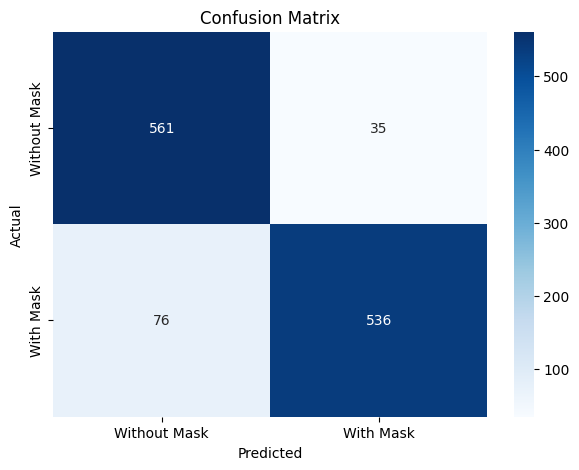

Confusion Matrix:
[[561  35]
 [ 76 536]]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

# Step 1: Make predictions on the validation set using the evaluation generator
eval_generator.reset() # Reset the evaluation generator
y_pred_probs = model.predict(eval_generator, verbose=1, steps=eval_generator.samples // batch_size + 1) # Predict on all samples
y_pred = (y_pred_probs > 0.5).astype('int32')  # Convert probabilities to binary values (0 or 1)

# Get the true labels in the same order as the predictions from the evaluation generator
y_true = eval_generator.classes[eval_generator.index_array]

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally: Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [13]:
!ls /mnt/data/



extracted_test	extracted_train


In [14]:
!ls /mnt/data/extracted_test/
!ls /mnt/data/extracted_train/


Test
Test  Train


In [15]:
!ls /mnt/data/extracted_test/Test
!ls /mnt/data/extracted_train/Train


with_mask  without_mask
with_mask  without_mask


In [38]:
# Create a separate generator for evaluation without shuffling
eval_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # No augmentation for evaluation, use validation_split

eval_generator = eval_datagen.flow_from_directory(
    train_dir, # Use the train directory where the validation split was applied
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation', # Use the validation subset
    shuffle=False # Important: Do not shuffle the data for evaluation
)

Found 1208 images belonging to 2 classes.
